# render和图像保存

In [1]:
import gymnasium as gym
import time

## 1.mode1 = "Human"

In [2]:
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode = "human")
state = env.reset()

done = False
score = 0
total_reward = 0

while not done:
    env.render()
    action = env.action_space.sample()
    print(action)
    observation, reward, done, truncated, info = env.step(action)
    score += reward
    done = done or truncated
    time.sleep(0.2)
env.close()
print(f"total scores: {score}")

1
1
0
1
1
0
0
1
1
0
1
1
0
total scores: 13.0


## 2.mode = "rgb_array" 以及 render save

In [12]:
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode = "rgb_array")
state = env.reset()

done = False
total_reward = 0

frames = []
while not done:
    frames.append(env.render())
    action = env.action_space.sample()
    # print(action)
    observation, reward, done, truncated, info = env.step(action)
    total_reward += reward
    done = done or truncated
    time.sleep(0.5)
env.close()
print(f" total scores: {total_reward}\n frames lens is:{len(frames)} and shape is:{frames[0].shape}")

total scores: 27.0
 frames lens is:27and shape is:(400, 600, 3)


In [14]:
!pip install matplotlib

In [15]:
import matplotlib.pyplot as plt
from matplotlib import animation

In [34]:
def display_frames_to_video(frames):
    plt.figure(
        figsize=(frames[0].shape[0]/72, frames[1].shape[1]/72), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis("off")

    def animate(i):
        patch.set_data(frames[i])
    
    anim = animation.FuncAnimation(
        plt.gcf(), animate, frames=range(len(frames)), interval=50
    )
    # anim.save('cartpole.mp4', writer='ffmpeg', fps=20)
    anim.save('cartpole.gif', writer='pillow', fps=20)

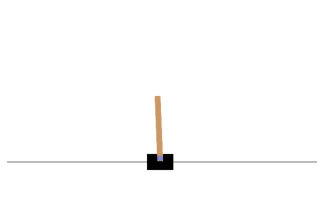

In [35]:
display_frames_to_video(frames)